# Bank Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use("Solarize_Light2")

## Loading Dataset

In [2]:
df = pd.read_csv("./bank-full.csv", delimiter=";")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
from sklearn.preprocessing import LabelBinarizer

X = df.drop("y", axis=1)
y = df.loc[:, "y"]

lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

y_encoded

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.1, random_state=42)

## Features Analysis & Engineering

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40689 entries, 14565 to 15795
Data columns (total 16 columns):
age          40689 non-null int64
job          40689 non-null object
marital      40689 non-null object
education    40689 non-null object
default      40689 non-null object
balance      40689 non-null int64
housing      40689 non-null object
loan         40689 non-null object
contact      40689 non-null object
day          40689 non-null int64
month        40689 non-null object
duration     40689 non-null int64
campaign     40689 non-null int64
pdays        40689 non-null int64
previous     40689 non-null int64
poutcome     40689 non-null object
dtypes: int64(7), object(9)
memory usage: 5.3+ MB


In [7]:
features = X_train.columns

for col in features:
    print(col)
    unique = X_train.loc[:, col].unique()
    if len(unique) < 100:
        print(unique)
    print()

age
[29 57 54 52 34 50 40 43 59 53 35 49 32 28 56 27 39 58 60 41 51 30 33 36
 46 31 42 44 48 26 55 25 80 47 23 37 45 38 68 20 79 67 65 64 22 62 73 24
 61 21 70 74 82 75 71 76 77 66 86 18 69 83 63 87 81 78 84 19 93 72 89 85
 90 94 92 88 95]

job
['housemaid' 'management' 'blue-collar' 'services' 'admin.' 'technician'
 'unemployed' 'retired' 'self-employed' 'entrepreneur' 'unknown' 'student']

marital
['married' 'divorced' 'single']

education
['primary' 'secondary' 'tertiary' 'unknown']

default
['no' 'yes']

balance

housing
['yes' 'no']

loan
['no' 'yes']

contact
['cellular' 'unknown' 'telephone']

day
[15 12  5 10  4  6 16 17 21 28 23 27  2 29  9 26 31 22 13 30  3  8 20 18
  7 14 11 25  1 19 24]

month
['jul' 'aug' 'may' 'nov' 'jun' 'apr' 'jan' 'feb' 'oct' 'mar' 'sep' 'dec']

duration

campaign
[ 3  2  1  4  6 18  8 14 21  5 10 20 13 11 16  7 17 12  9 22 15 28 27 32
 30 55 19 26 23 37 29 36 25 31 24 34 33 63 46 38 35 39 43 41 50 58 44 51]

pdays

previous
[  0   2   5   1  23  17   

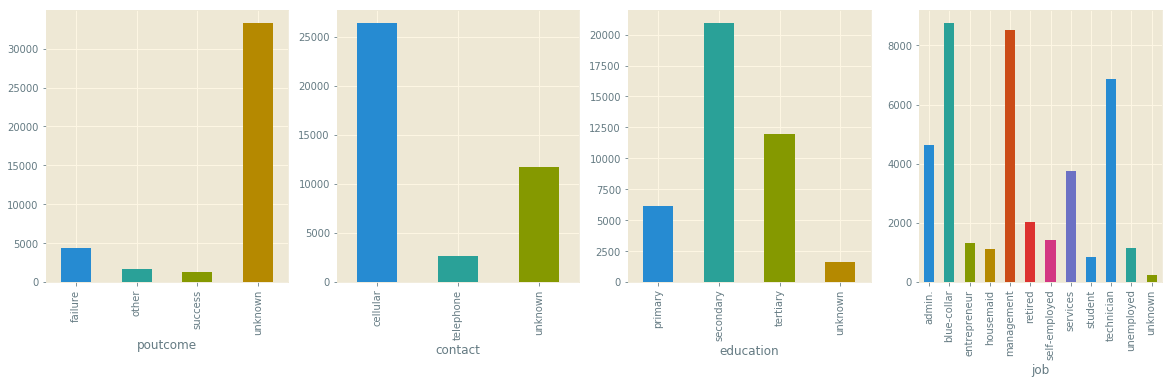

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4)

for i, col in enumerate(["poutcome", "contact", "education", "job"]):
    X_train.groupby(col).count().previous.plot('bar', figsize=(20, 5), ax=axes[i])

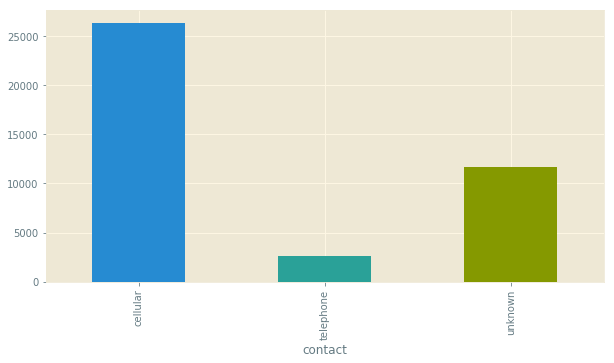

In [9]:
X_train.groupby("contact").count().previous.plot('bar', figsize=(10, 5))

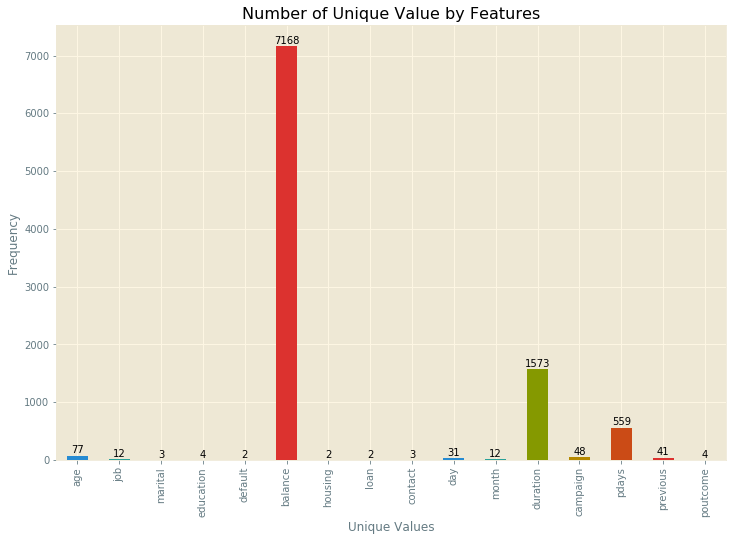

In [10]:
features = X_train.columns
unique_vals = [len(df.loc[:, col].unique()) for col in features]
freq_series = pd.Series(unique_vals)

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Number of Unique Value by Features')
ax.set_xlabel('Unique Values')
ax.set_ylabel('Frequency')
ax.set_xticklabels(features)

# Add value labels for each bar
rects = ax.patches

for rect, label in zip(rects, unique_vals):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

In [11]:
X_train.month.unique()

array(['jul', 'aug', 'may', 'nov', 'jun', 'apr', 'jan', 'feb', 'oct',
       'mar', 'sep', 'dec'], dtype=object)

In [12]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14565,29,housemaid,married,primary,no,0,yes,no,cellular,15,jul,317,3,-1,0,unknown
20546,57,management,divorced,secondary,no,396,no,no,cellular,12,aug,108,2,-1,0,unknown
34495,54,blue-collar,married,primary,no,714,no,no,cellular,5,may,225,1,-1,0,unknown
13814,52,services,married,secondary,no,2072,no,no,cellular,10,jul,224,1,-1,0,unknown
42153,34,management,married,tertiary,no,1778,no,no,cellular,4,nov,358,1,162,2,failure


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

corr_df = X_train.copy()

months = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
          "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
corr_df.month = corr_df.month.apply(lambda x: months[x])

edu = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
corr_df.education = corr_df.education.apply(lambda x: edu[x])

bin_map = {"yes": 1, "no": 0}
bin_cols = corr_df.loc[:, ["default", "housing", "loan"]].apply(
    lambda x: x.map(bin_map))
corr_df.loc[:, ["default", "housing", "loan"]] = bin_cols

corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40689 entries, 14565 to 15795
Data columns (total 16 columns):
age          40689 non-null int64
job          40689 non-null object
marital      40689 non-null object
education    40689 non-null int64
default      40689 non-null int64
balance      40689 non-null int64
housing      40689 non-null int64
loan         40689 non-null int64
contact      40689 non-null object
day          40689 non-null int64
month        40689 non-null int64
duration     40689 non-null int64
campaign     40689 non-null int64
pdays        40689 non-null int64
previous     40689 non-null int64
poutcome     40689 non-null object
dtypes: int64(12), object(4)
memory usage: 5.3+ MB


[]

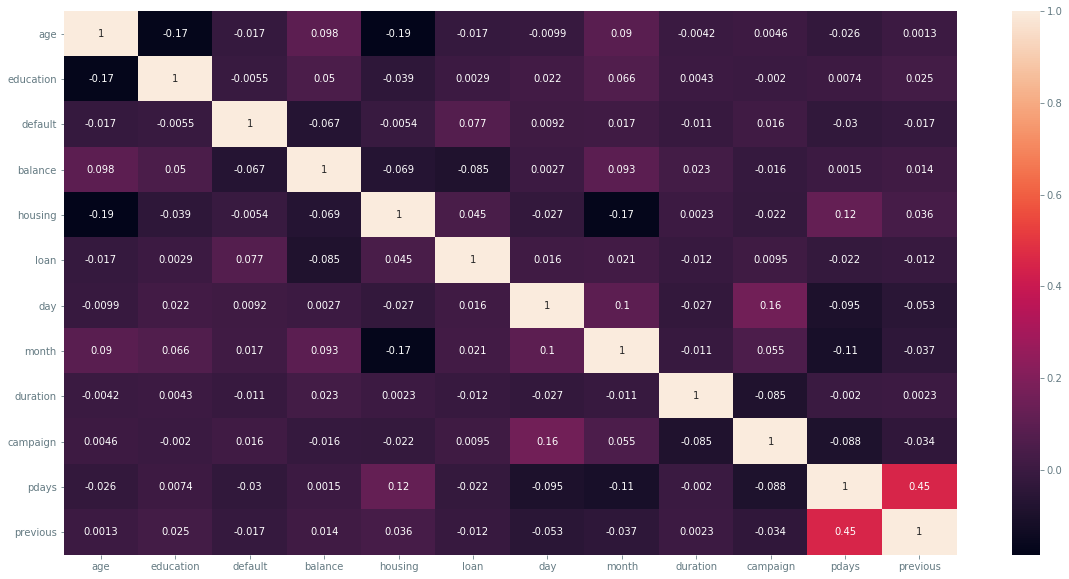

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.heatmap(corr_df.corr(), annot=True, ax=ax)
plt.plot()

In [15]:
from scipy import stats
from collections import Counter

z_threshold = 3
print(corr_df.select_dtypes("int"))
z = np.abs(stats.zscore(corr_df.select_dtypes("int")))
print(z)
z_outliers = np.where(z > z_threshold)
print(z_outliers[0])
print(corr_df.iloc[z_outliers[0]].index)

if len(z_outliers[0]) < len(corr_df) * 0.05:
    corr_df.drop(corr_df.iloc[z_outliers[0]].index, inplace=True)
    
corr_df.head(10)

       age  education  default  balance  housing  loan  day  month  duration  \
14565   29          1        0        0        1     0   15      7       317   
20546   57          2        0      396        0     0   12      8       108   
34495   54          1        0      714        0     0    5      5       225   
13814   52          2        0     2072        0     0   10      7       224   
42153   34          3        0     1778        0     0    4     11       358   
19443   50          2        0      706        1     0    6      8      1250   
14942   40          2        0      641        0     0   16      7       156   
3277    43          1        0      960        1     1   15      5       241   
15158   59          3        0     6108        1     0   17      7       796   
27468   53          2        0     2693        0     0   21     11       140   
17155   35          3        0      670        1     0   28      7       177   
16379   49          2        1     2405 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14565,29,housemaid,married,1,0,0,1,0,cellular,15,7,317,3,-1,0,unknown
20546,57,management,divorced,2,0,396,0,0,cellular,12,8,108,2,-1,0,unknown
34495,54,blue-collar,married,1,0,714,0,0,cellular,5,5,225,1,-1,0,unknown
13814,52,services,married,2,0,2072,0,0,cellular,10,7,224,1,-1,0,unknown
42153,34,management,married,3,0,1778,0,0,cellular,4,11,358,1,162,2,failure
19443,50,admin.,married,2,0,706,1,0,cellular,6,8,1250,4,-1,0,unknown
14942,40,technician,single,2,0,641,0,0,cellular,16,7,156,6,-1,0,unknown
3277,43,unemployed,married,1,0,960,1,1,unknown,15,5,241,2,-1,0,unknown
15158,59,retired,married,3,0,6108,1,0,cellular,17,7,796,2,-1,0,unknown
27468,53,management,married,2,0,2693,0,0,cellular,21,11,140,1,-1,0,unknown


In [16]:
# unique_vals = [len(df.loc[:, col].unique()) for col in features]

# to_categorical = (freq_series == 2)
# print(X_train_tmp.values[:, 4])
# ct = ColumnTransformer(
#     [("ord_enc", OrdinalEncoder(), [4, 6, 7])],
#     remainder='passthrough'
# )
# print(X_train_tmp.values)
# xx = ct.fit_transform(X_train_tmp.values)
# corr_df = pd.DataFrame(xx, columns=features)

# corr_df

In [17]:
categorical_threshold = 100
categorical_features = freq_series < categorical_threshold
categorical_features

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13    False
14     True
15     True
dtype: bool

In [18]:
expected_features = sum([x if x < 100 else 1 for x in freq_series])
f"#features expected after one-hot encoding: {expected_features}"

'#features expected after one-hot encoding: 244'

In [19]:
categorical_features

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13    False
14     True
15     True
dtype: bool

In [20]:
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), categorical_features)],
    remainder='passthrough'
)

X_train_fit = ct.fit_transform(X_train.values)
X_train_fit_shape = X_train_fit.shape
print(X_train_fit_shape)
print(X_train_fit)

(40689, 243)
[[0.0 0.0 0.0 ... 0 317 -1]
 [0.0 0.0 0.0 ... 396 108 -1]
 [0.0 0.0 0.0 ... 714 225 -1]
 ...
 [0.0 0.0 0.0 ... 1317 239 -1]
 [0.0 0.0 0.0 ... 165 111 -1]
 [0.0 0.0 0.0 ... -41 68 -1]]


In [21]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import LabelEncoder
from collections import OrderedDict


class DataframeFeatureDrop(BaseEstimator, TransformerMixin):
    def __init__(self, drop_attrs):
        self.drop_attrs = drop_attrs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(self.drop_attrs, axis=1)
    
    
class DataframeRowDrop(BaseEstimator, TransformerMixin): 
    def __init__(self, row_index):
        self.row_index = row_index 
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(X.iloc[self.row_index].index)
    
    
class DataframeFeatureMapping(BaseEstimator, TransformerMixin):
    def __init__(self, **kwargs):
        self.kwargs = kwargs
        # print(kwargs)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        tmp = X.copy()
        for col, mapping in self.kwargs.items():
            tmp.loc[:, col] = tmp.loc[:, col].apply(lambda x: mapping[x])
        return tmp
    
    
def generate_categorical_encoder(df, features_to_encode):
    encoders = OrderedDict()
    all_features = list(df.columns)
    
    for col in features_to_encode:
        if col in all_features and df.loc[:, col].dtype == object:
            col_index = all_features.index(col)
            encoders[col_index] = OrdinalEncoder()
                
    return encoders
    
    
class DataframeCategoricalEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_encode):
        self.features_to_encode = features_to_encode

    def fit(self, X, y=None):
        self.__categorical_encs = generate_categorical_encoder(
            X, self.features_to_encode)
        
        for col, enc in self.__categorical_encs.items():
            enc.fit(X.values[:, col].reshape(-1, 1))
        
        return self
    
    def transform(self, X):
        encoder_attr = "_DataframeCategoricalEncoding__categorical_encs"

        if hasattr(self, encoder_attr):
            X_tmp = X.copy()
            for col, enc in self.__categorical_encs.items():
                enc_col = enc.transform(X_tmp.values[:, col].reshape(-1, 1))
                X_tmp.iloc[:, col] = enc_col.reshape(-1, 1)
            res = X_tmp
        else:
            res = self.fit_transform(X)

        return res
    
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14565,29,housemaid,married,primary,no,0,yes,no,cellular,15,jul,317,3,-1,0,unknown
20546,57,management,divorced,secondary,no,396,no,no,cellular,12,aug,108,2,-1,0,unknown
34495,54,blue-collar,married,primary,no,714,no,no,cellular,5,may,225,1,-1,0,unknown
13814,52,services,married,secondary,no,2072,no,no,cellular,10,jul,224,1,-1,0,unknown
42153,34,management,married,tertiary,no,1778,no,no,cellular,4,nov,358,1,162,2,failure


In [22]:
df_enc = DataframeCategoricalEncoding(["job", "marital", "contact"])
xx = df_enc.fit_transform(X_train)
xx.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14565,29,3.0,1.0,primary,no,0,yes,no,0.0,15,jul,317,3,-1,0,unknown
20546,57,4.0,0.0,secondary,no,396,no,no,0.0,12,aug,108,2,-1,0,unknown
34495,54,1.0,1.0,primary,no,714,no,no,0.0,5,may,225,1,-1,0,unknown
13814,52,7.0,1.0,secondary,no,2072,no,no,0.0,10,jul,224,1,-1,0,unknown
42153,34,4.0,1.0,tertiary,no,1778,no,no,0.0,4,nov,358,1,162,2,failure
19443,50,0.0,1.0,secondary,no,706,yes,no,0.0,6,aug,1250,4,-1,0,unknown
14942,40,9.0,2.0,secondary,no,641,no,no,0.0,16,jul,156,6,-1,0,unknown
3277,43,10.0,1.0,primary,no,960,yes,yes,2.0,15,may,241,2,-1,0,unknown
15158,59,5.0,1.0,tertiary,no,6108,yes,no,0.0,17,jul,796,2,-1,0,unknown
27468,53,4.0,1.0,secondary,no,2693,no,no,0.0,21,nov,140,1,-1,0,unknown


In [23]:
categorical_enc = ColumnTransformer(
    [("categorical_enc1", OrdinalEncoder(), [1])],
    remainder='passthrough')

categorical_enc2 = ColumnTransformer(
    [("categorical_enc1", OrdinalEncoder(), [2])],
    remainder='passthrough')

categorical_enc2.fit_transform(categorical_enc.fit_transform(X_train.values))

array([[1.0, 3.0, 29, ..., -1, 0, 'unknown'],
       [0.0, 4.0, 57, ..., -1, 0, 'unknown'],
       [1.0, 1.0, 54, ..., -1, 0, 'unknown'],
       ...,
       [0.0, 9.0, 34, ..., -1, 0, 'unknown'],
       [1.0, 5.0, 33, ..., -1, 0, 'unknown'],
       [1.0, 1.0, 38, ..., -1, 0, 'unknown']], dtype=object)

In [24]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14565,29,housemaid,married,primary,no,0,yes,no,cellular,15,jul,317,3,-1,0,unknown
20546,57,management,divorced,secondary,no,396,no,no,cellular,12,aug,108,2,-1,0,unknown
34495,54,blue-collar,married,primary,no,714,no,no,cellular,5,may,225,1,-1,0,unknown
13814,52,services,married,secondary,no,2072,no,no,cellular,10,jul,224,1,-1,0,unknown
42153,34,management,married,tertiary,no,1778,no,no,cellular,4,nov,358,1,162,2,failure


In [25]:
from sklearn.pipeline import Pipeline

months = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
          "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
edu = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
bin_map = {"yes": 1, "no": 0}

maps = {"month": months, "education": edu, "default": bin_map, 
        "housing": bin_map, "loan": bin_map}

# ct = ColumnTransformer(
#     [('oh_enc', OneHotEncoder(sparse=False), categorical_features)],
#     remainder='passthrough'
# )    

# DataframeRowDrop(z_outliers[0])

trn_pipe = Pipeline([
    ("feature_drop", DataframeFeatureDrop(["poutcome"])),
    # ("row_drop", DataframeRowDrop(z_outliers[0])),
    ("feature_map", DataframeFeatureMapping(**maps)),
    ("categorical_enc", DataframeCategoricalEncoding(["job", "marital", "contact"]))
])

X_train_pipe = trn_pipe.fit_transform(X_train)
X_train_pipe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
14565,29,3.0,1.0,1,0,0,1,0,0.0,15,7,317,3,-1,0
20546,57,4.0,0.0,2,0,396,0,0,0.0,12,8,108,2,-1,0
34495,54,1.0,1.0,1,0,714,0,0,0.0,5,5,225,1,-1,0
13814,52,7.0,1.0,2,0,2072,0,0,0.0,10,7,224,1,-1,0
42153,34,4.0,1.0,3,0,1778,0,0,0.0,4,11,358,1,162,2


In [28]:
def remove_outliers(X_train, y_train):
    X_tmp = X_train.copy()
    y_tmp = y_train.copy()
    
    z_threshold = 4
    z = np.abs(stats.zscore(X_train))
    z_outliers = np.where(z > z_threshold)
        
    if len(z_outliers[0]) < len(X_train) * 0.1:
        mask = np.ones(len(X_tmp), dtype=bool)
        mask[z_outliers[0]] = False
        X_tmp = X_tmp[mask, :]
        y_tmp = y_tmp[mask, :]
    else:
        pass # use imputation
    
    return X_tmp, y_tmp

x_t, y_t = remove_outliers(X_train_pipe.values, y_train)

## Models

In [30]:
from sklearn.metrics import accuracy_score

Preprocessing:
- create drop column class for pipeline - drop poutcome
- remove outlier rows based on z-score for continuous features - features which come at int64
- imputation for categorical features - initially contact, education, job (see if this works well and then if not use imputation)
- create encoding class for pipeline to take dictionary and column name OR just use OrdinalEncoder OR go straight to one-hot encoding of models


- run some baseline models without one-hot encoding to determine feature-importance and try the tests for feature importance from the old kaggle notebooks
- from this maybe drop some features if completely irrelevant


- PCA of features for one hot encoding
- try more complex models, use paper as a reference point
- remember to scale features for certain features
- build a number of weak learners, use them to build a stacked generalisation
- compare the stacked generalisation with Out of the box model


- For the final model, do a final grid search + a bayesian search coded up manually 


- Write the solution into a formal class file with hardcoded hyperparams. 

### Baseline Models

#### SVC

In [70]:
from sklearn.svm import LinearSVC

trn_pipe = Pipeline([
    ("feature_drop", DataframeFeatureDrop(["poutcome"])),
    ("feature_map", DataframeFeatureMapping(**maps)),
    ("categorical_enc", DataframeCategoricalEncoding(["job", "marital", "contact"]))
])

X_train2 = trn_pipe.fit_transform(X_train)

X_train_clean, y_train_clean = remove_outliers(X_train2.values, y_train)

svc = LinearSVC(random_state=41, loss="hinge")
svc.fit(X_train_clean, y_train_clean)

y_pred = svc.predict(X_train_clean)
relative_acc = accuracy_score(y_pred, y_train_clean)
print(relative_acc)

0.8914607035438734


In [71]:
X_test2 = trn_pipe.transform(X_test)

y_test_pred = svc.predict(X_test2)
relative_acc = accuracy_score(y_test_pred, y_test)
print(relative_acc)

0.8794781070322866


#### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

trn_pipe = Pipeline([
    ("feature_drop", DataframeFeatureDrop(["poutcome"])),
    ("feature_map", DataframeFeatureMapping(**maps)),
    ("categorical_enc", DataframeCategoricalEncoding(["job", "marital", "contact"]))
])

X_train2 = trn_pipe.fit_transform(X_train)

X_train_clean, y_train_clean = remove_outliers(X_train2.values, y_train)

rdm_forest = RandomForestClassifier(max_depth=50, n_estimators=150, random_state=42)
rdm_forest.fit(X_train_clean, y_train_clean)

y_pred = rdm_forest.predict(X_train_clean)
relative_acc = accuracy_score(y_pred, y_train_clean)
print(relative_acc)

1.0


In [87]:
X_test2 = trn_pipe.transform(X_test)

y_test_pred = rdm_forest.predict(X_test2)
relative_acc = accuracy_score(y_test_pred, y_test)
print(relative_acc)

0.8956214064573198


#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

trn_pipe = Pipeline([
    ("feature_drop", DataframeFeatureDrop(["poutcome"])),
    ("feature_map", DataframeFeatureMapping(**maps)),
    ("categorical_enc", DataframeCategoricalEncoding(["job", "marital", "contact"]))
])

X_train2 = trn_pipe.fit_transform(X_train)

X_train_clean, y_train_clean = remove_outliers(X_train2.values, y_train)

gbc_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.32, random_state=42)
gbc_clf.fit(X_train_clean, y_train_clean)

y_pred = gbc_clf.predict(X_train_clean)
relative_acc = accuracy_score(y_pred, y_train_clean)
print(relative_acc)

In [ ]:
X_test2 = trn_pipe.transform(X_test)

y_test_pred = gbc_clf.predict(X_test2)
relative_acc = accuracy_score(y_test_pred, y_test)
print(relative_acc)

### Feature Importance

### One-Hot Encoding

In [349]:
from sklearn.ensemble import RandomForestClassifier

trn_pipe = Pipeline([
    ("feature_drop", DataframeFeatureDrop(["poutcome"])),
    ("feature_map", DataframeFeatureMapping(**maps)),
    ("categorical_enc", DataframeCategoricalEncoding(["job", "marital", "contact"])),
])

X_train2 = trn_pipe.fit_transform(X_train)

# Categorical Features Mask
categorical_threshold = 100
features = X_train2.columns
unique_vals_count = [len(X_train2.loc[:, col].unique()) for col in features]
freq_series = np.array(unique_vals_count)

categorical_features = np.ones(len(features), dtype=bool)
categorical_features[freq_series > categorical_threshold] = False

# Remove Outliers
X_train_clean, y_train_clean = remove_outliers(X_train2.values, y_train)

# Label Binarizer
lb = LabelBinarizer(sparse_output=False)
y_train_enc = lb.fit_transform(y_train_clean)

# One Hot Encoding Features
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical_features)],
    remainder='passthrough'
)
X_train3 = ct.fit_transform(X_train_clean)

rdm_forest = RandomForestClassifier()
rdm_forest.fit(X_train3, y_train_enc)

y_pred = rdm_forest.predict(X_train3)
relative_acc = accuracy_score(y_pred, y_train_enc)
print("Training Accuracy:", relative_acc)

Training Accuracy: 0.9922060938930299


In [350]:
X_test2 = trn_pipe.transform(X_test)
X_test3 = ct.transform(X_test2)

y_test_enc = lb.transform(y_test)

y_test_pred = rdm_forest.predict(X_test3)
relative_acc = accuracy_score(y_test_pred, y_test_enc)
print("Testing Accuracy:", relative_acc)

Testing Accuracy: 0.8898717381689518


### One-Hot Encoding with Sparse Matrices

In [355]:
from sklearn.ensemble import RandomForestClassifier

trn_pipe = Pipeline([
    ("feature_drop", DataframeFeatureDrop(["poutcome"])),
    ("feature_map", DataframeFeatureMapping(**maps)),
    ("categorical_enc", DataframeCategoricalEncoding(["job", "marital", "contact"])),
])

X_train2 = trn_pipe.fit_transform(X_train)

# Categorical Features Mask
categorical_threshold = 100
features = X_train2.columns
unique_vals_count = [len(X_train2.loc[:, col].unique()) for col in features]
freq_series = np.array(unique_vals_count)

categorical_features = np.ones(len(features), dtype=bool)
categorical_features[freq_series > categorical_threshold] = False

# Remove Outliers
X_train_clean, y_train_clean = remove_outliers(X_train2.values, y_train)

# Label Binarizer
lb = LabelBinarizer(sparse_output=False)
y_train_enc = lb.fit_transform(y_train_clean)

# One Hot Encoding Features
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=True, handle_unknown="ignore"), categorical_features)],
    remainder='passthrough'
)
X_train3 = ct.fit_transform(X_train_clean)

rdm_forest = RandomForestClassifier()
rdm_forest.fit(X_train3, y_train_enc)

y_pred = rdm_forest.predict(X_train3)
relative_acc = accuracy_score(y_pred, y_train_enc)
print("Training Accuracy:", relative_acc)

Training Accuracy: 0.9905583889106839


In [356]:
X_test2 = trn_pipe.transform(X_test)
X_test3 = ct.transform(X_test2)

y_test_enc = lb.transform(y_test)

y_test_pred = rdm_forest.predict(X_test3)
relative_acc = accuracy_score(y_test_pred, y_test_enc)
print("Testing Accuracy:", relative_acc)

Testing Accuracy: 0.885891198584697


### One-Hot Encoding + PCA

In [367]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

trn_pipe = Pipeline([
    ("feature_drop", DataframeFeatureDrop(["poutcome"])),
    ("feature_map", DataframeFeatureMapping(**maps)),
    ("categorical_enc", DataframeCategoricalEncoding(["job", "marital", "contact"])),
])

X_train2 = trn_pipe.fit_transform(X_train)

# Categorical Features Mask
categorical_threshold = 100
features = X_train2.columns
unique_vals_count = [len(X_train2.loc[:, col].unique()) for col in features]
freq_series = np.array(unique_vals_count)

categorical_features = np.ones(len(features), dtype=bool)
categorical_features[freq_series > categorical_threshold] = False

# Remove Outliers
X_train_clean, y_train_clean = remove_outliers(X_train2.values, y_train)

# Label Binarizer
lb = LabelBinarizer(sparse_output=False)
y_train_enc = lb.fit_transform(y_train_clean)

# One Hot Encoding Features
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical_features)],
    remainder='passthrough'
)

# PCA
rdm_forest_pipeline = Pipeline([
    ("oh_enc", ct),
    ("pca", PCA(n_components=0.99)),
    ("rdm_forest", RandomForestClassifier())
])

rdm_forest_pipeline.fit(X_train_clean, y_train_enc)
y_pred = rdm_forest_pipeline.predict(X_train_clean)
relative_acc = accuracy_score(y_pred, y_train_enc)
print("Training Accuracy:", relative_acc)

Training Accuracy: 0.9836014123185562


In [368]:
y_test_enc = lb.transform(y_test)

X_test2 = trn_pipe.transform(X_test)
y_test_pred = rdm_forest_pipeline.predict(X_test2)

relative_acc = accuracy_score(y_test_pred, y_test_enc)
print("Testing Accuracy:", relative_acc)

Testing Accuracy: 0.856921716054843


## Optimisation

## Conclusions

## References

In [305]:
len(X_test)

4522